In [1]:
# Ahmad Sharif
# K436765
# DATA.STAT.840 Statistical Methods for Text Data Analysis 

In [24]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import urllib
import random
import requests
import bs4
import urllib.request
import numpy
from nltk.corpus import stopwords
nltk.download('stopwords')


webpage_url = "https://gutenberg.org/browse/scores/top"
webpage_html = requests.get(webpage_url)
webpage_parsed_html = bs4.BeautifulSoup(webpage_html.content, 'html.parser')

pageList = webpage_parsed_html.find("h2", {"id": "books-last30"})
ol = pageList.find_next_sibling("ol")
book_list = {}
book_id_list = []

def collect_all_download_link(count):
    index = 0
    for x in (ol.findAll('li')):
        index = index + 1
        url = x.a['href']
        
        book_id = url.split('/')[2]
        book_name = x.a.text
        
        book_id_list.append(book_id)
        download_link = 'https://www.gutenberg.org/files/' + book_id + '/' + book_id + '-0.txt'
        if(index < count):
            print(index, " : ", download_link)
        if(index < count):
            book_list[book_id] = {
                "book_name": book_name,
                "download_link": download_link
            }
collect_all_download_link(20)

[nltk_data] Downloading package stopwords to /home/ahmad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1  :  https://www.gutenberg.org/files/84/84-0.txt
2  :  https://www.gutenberg.org/files/1513/1513-0.txt
3  :  https://www.gutenberg.org/files/1342/1342-0.txt
4  :  https://www.gutenberg.org/files/25344/25344-0.txt
5  :  https://www.gutenberg.org/files/11/11-0.txt
6  :  https://www.gutenberg.org/files/345/345-0.txt
7  :  https://www.gutenberg.org/files/174/174-0.txt
8  :  https://www.gutenberg.org/files/5200/5200-0.txt
9  :  https://www.gutenberg.org/files/64317/64317-0.txt
10  :  https://www.gutenberg.org/files/26184/26184-0.txt
11  :  https://www.gutenberg.org/files/2542/2542-0.txt
12  :  https://www.gutenberg.org/files/1952/1952-0.txt
13  :  https://www.gutenberg.org/files/1080/1080-0.txt
14  :  https://www.gutenberg.org/files/43/43-0.txt
15  :  https://www.gutenberg.org/files/844/844-0.txt
16  :  https://www.gutenberg.org/files/98/98-0.txt
17  :  https://www.gutenberg.org/files/2701/2701-0.txt
18  :  https://www.gutenberg.org/files/41/41-0.txt
19  :  https://www.gutenberg.org/files/

In [25]:
book_id = random.choice(book_id_list)
print("Book ID : ", book_id)
crawled_lemmatize_word_list = []
book_id = list(book_list.keys())[0]
url = "https://www.gutenberg.org/files/" + book_id + "/" + book_id + "-0.txt"
book_content = urllib.request.urlopen(url).read().decode('utf-8')

book_content[200:300]

Book ID :  1513


' almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof '

In [4]:
# Prune the vocabulary to remove stopwords, overly short and long words, the top 1% most frequent
# words and words occurring less than 4 times. Report the top-100 words after pruning.



crawled_lemmatize_word_list = []
book_id = list(book_list.keys())[0]
url = "https://www.gutenberg.org/files/" + book_id + "/" + book_id + "-0.txt"
book_content = urllib.request.urlopen(url).read().decode('utf-8')

# print(book_content)



# Tokenize
book_word_list = word_tokenize(book_content)
# print(book_word_list)


# Lemmatize
lemmatizer = WordNetLemmatizer()
for word in book_word_list:
    l = lemmatizer.lemmatize(word).lower()
    crawled_lemmatize_word_list.append(l)
    nltk_text = nltk.Text(l)
    

unified_vocabulary_array = numpy.unique(crawled_lemmatize_word_list, return_inverse=True)
unified_vocabulary = unified_vocabulary_array[0]

#%% Count the numbers of occurrences of each unique word
# Let's count also various statistics over the documents


unifiedvocabulary_total_occurrence_counts = len(numpy.zeros((len(unified_vocabulary),1)))
unifiedvocabulary_total_occurrence_counts



word_counter = {}
for word in crawled_lemmatize_word_list:
    word_counter[word] = word_counter.get(word, 0) + 1
    
    

freq = nltk.FreqDist(crawled_lemmatize_word_list)
freq

stop_words = stopwords.words('english')
stop_words.extend(['#', '!', '.', '*', '&', '%', '&', '(', ')', '$', '-', '_', '--', '', ',', '.', '?', ';'])

filtered_word_list =[] 

for word in unified_vocabulary:
    if((word not in stop_words) and (word.isalpha() == True) and (len(unified_vocabulary) > 2) or (len(unified_vocabulary) < 20)):
        filtered_word_list.append(word)
       

# --- Top 1% Words  --- #
for word in filtered_word_list:
    if((word in word_counter) and word_counter[word] > (unifiedvocabulary_total_occurrence_counts * 0.01)):
        filtered_word_list.remove(word)
        
len(filtered_word_list)

# Top 100

filtered_word_list[0:100]

['abandon',
 'abandoned',
 'abbey',
 'abhor',
 'abhorred',
 'abhorrence',
 'abhorrent',
 'abide',
 'ability',
 'abject',
 'able',
 'aboard',
 'abode',
 'abortion',
 'abortive',
 'abroad',
 'abrupt',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absolution',
 'absorbed',
 'absorbing',
 'abstained',
 'abstruse',
 'abyss',
 'acceded',
 'accent',
 'accept',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accessed',
 'accessible',
 'accident',
 'accidentally',
 'accompanied',
 'accompany',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accordance',
 'accorded',
 'according',
 'accordingly',
 'account',
 'accounted',
 'accumulated',
 'accumulation',
 'accuracy',
 'accurate',
 'accursed',
 'accusation',
 'accuse',
 'accused',
 'accuses',
 'accustomed',
 'achieve',
 'achieved',
 'achievement',
 'aching',
 'acknowledged',
 'acorn',
 'acquaintance',
 'acquainted',
 'acquiesced',
 'acquire',
 'acquired',
 'acquirement',
 'acquiring',
 'acquisition',
 'acquit',
 'acquitted',
 '

In [5]:
# Exercise 3.1: Lexical dispersion in Pride and Prejudice
# (a) Download the Project Gutenberg .TXT ebook of Jane Austen's "Pride and Prejudice", and
# process it using the pipeline as in Exercise 2.2 (a)-(d), no need to prune the vocabulary. (See
# https://en.wikipedia.org/wiki/Pride_and_Prejudice for information about the work.)


    
webpage_url = "https://www.gutenberg.org/files/1342/1342-0.txt"


import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import urllib


crawled_lemmatize_word_list = []
book_content = urllib.request.urlopen(webpage_url).read().decode('utf-8')


# Tokenize
book_word_list = word_tokenize(book_content)
# print(book_word_list)


# Lemmatize
lemmatizer = WordNetLemmatizer()
for word in book_word_list:
    l = lemmatizer.lemmatize(word).lower()
    nltk_text = nltk.Text(l)
    crawled_lemmatize_word_list.append(l)
    
    
text = nltk.Text(book_word_list)
print(text)

<Text: ﻿The Project Gutenberg eBook of Pride and prejudice...>


<Axes: title={'center': 'Lexical Dispersion Plot'}, xlabel='Word Offset'>

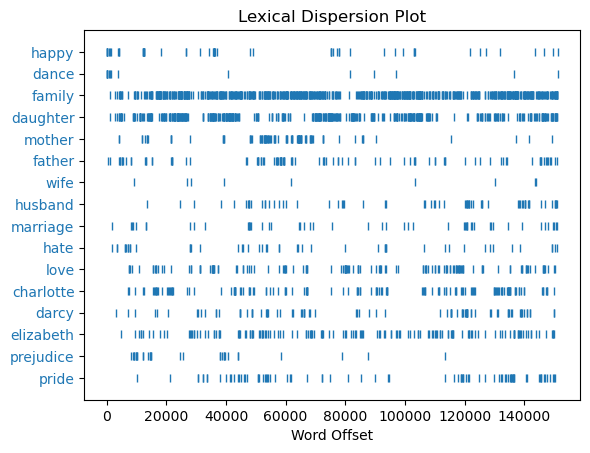

In [6]:
# (b) Compute a lexical dispersion plot (or plots) for the following words: 'pride', 'prejudice',
# 'elizabeth', 'darcy', 'charlotte', 'love', 'hate', 'marriage', 'husband', 'wife', 'father', 'mother',
# 'daughter', 'family', 'dance', 'happy'. You can do this either as a single plot or multiple
# separate plots for different words or groups of words. Report the resulting plots.

from nltk.draw.dispersion import dispersion_plot
targets = ['pride','prejudice','elizabeth', 'darcy', 'charlotte', 'love', 'hate', 'marriage', 'husband', 'wife', 'father', 'mother',
'daughter', 'family', 'dance', 'happy']


dispersion_plot(text, targets, ignore_case=True, title='Lexical Dispersion Plot')

 (c) Discuss the results. Do the plots suggest something about the focus of the text in different
 parts of the book? You may also inspect the lexical dispersion of other words if you wish.

Here "family" and "daughter" are most frequent used words. In contrast 'wife', 'dance' are less frequent words 

In [ ]:
# (d) Optional extra part: Ask a chatbot (see Exercise 2.4 for some resources on current chatbots)
# to summarize the plot of Pride and Prejudice. How well does the summary correspond to
# what the dispersion plot revealed to you?

Exercise 3.2: The concordances of Frankenstein.

(a) Download the Project Gutenberg .TXT ebook of Mary Wollstonecraft Shelley's
"Frankenstein; Or, The Modern Prometheus", and process it using the pipeline as in Exercise
2.2 (a)-(d), no need to prune the vocabulary. (See https://en.wikipedia.org/wiki/Frankenstein
for information about the work.)

(b) Create a concordance view of the following words each: 'science', 'horror', 'monster', 'fear'.
Comment on the results.

(c) Optional extra part: Ask a chatbot (see Exercise 2.4 for some resources on current chatbots)
to describe how science is featured in the novel Frankenstein. How well does the description
correspond to what you can see from the concordance views?
Report the resulting plots, your code, and your comments.


A concordance view shows us every occurrence of a given word, together with some context.

In [ ]:
from nltk.corpus import gutenberg
from nltk.text import Text


webpage_url = "https://www.gutenberg.org/cache/epub/41445/pg41445.txt"
book_content = urllib.request.urlopen(webpage_url).read().decode('utf-8')
crawled_lemmatize_word_list = []
# Tokenize
book_word_list = word_tokenize(book_content)
text = nltk.Text(book_word_list)

concordance_word = ['science', 'horror', 'monster', 'fear']

text.concordance(concordance_word)
# It does not match

Exercise 3.4: Regular expressions of Frankenstein.
Use the Python regular expression syntax to find occurrences of the phrase "for ... years" where ...
denotes one or more words in the middle of the phrase in "Frankenstein; Or, The Modern
Prometheus". Print the resulting matches.

• For this exercise, you do not need to (and should not) do most of the preprocessing of
Exercises 2.2 and 2.3, since regular expression search operates on the original string of
letters of the text.

• This particular use case was not discussed on the lecture: you will need to read more about
Python regular expressions here: https://docs.python.org/3/howto/regex.html . Hint: since
you want to allow words of arbitrary length between "for" and "years", consider repeating
patterns.

Report the matches you found and your program code. You also do this exercise in another language
or using another regular expression library.

In [22]:
import re
import urllib

webpage_url = "https://www.gutenberg.org/cache/epub/41445/pg41445.txt"
book_content = urllib.request.urlopen(webpage_url).read().decode('utf-8')

regex = '*for *years'
# x = re.search(regex, book_content)

' use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with '